<a href="https://colab.research.google.com/github/deepasrii/Car-Brand-Classification-using-Deep-Learning/blob/main/car_brand_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Car Model Classification using Tranfer Learning Resnet50**

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#reisize all the images
IMAGE_SIZE = [224,224] #width, height

train_path = "/content/drive/MyDrive/Datasets/DiffCarDatasets/Train"
test_path = "/content/drive/MyDrive/Datasets/DiffCarDatasets/Test"

In [3]:
# import resnet50 library - add preprocessing layer to the front of resnet50
# in this we use imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # 3 indicates RGB channel of an image

94781440/94765736 [==============================] - 1s 0us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#dont train existing weights

for layer in resnet.layers:
  layer.trainable=False

In [7]:
# useful for getting number of output classes
folders = glob("/content/drive/MyDrive/Datasets/DiffCarDatasets/Train/*")

In [8]:
folders

['/content/drive/MyDrive/Datasets/DiffCarDatasets/Train/audi',
 '/content/drive/MyDrive/Datasets/DiffCarDatasets/Train/lamborghini',
 '/content/drive/MyDrive/Datasets/DiffCarDatasets/Train/mercedes']

In [9]:
# our layers - can add more if necessary
x=Flatten()(resnet.output)

In [10]:
len(folders)

3

In [11]:
prediction = Dense(len(folders),activation="softmax")(x)

#create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
#view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
#optimization of the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [14]:
##data augumentation and optimization by reading all images from the folder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
#provide same target size as initiated for image size
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Datasets/DiffCarDatasets/Train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Datasets/DiffCarDatasets/Test",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 58 images belonging to 3 classes.


In [17]:
#fit the model
#run the cell
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
2/2 [==============================] - 44s 25s/step - loss: 7.2141 - accuracy: 0.2812 - val_loss: 7.1081 - val_accuracy: 0.1552
Epoch 2/30
2/2 [==============================] - 18s 13s/step - loss: 4.9709 - accuracy: 0.3125 - val_loss: 3.8593 - val_accuracy: 0.3276
Epoch 3/30
2/2 [==============================] - 17s 12s/step - loss: 5.0915 - accuracy: 0.3906 - val_loss: 2.7064 - val_accuracy: 0.5517
Epoch 4/30
2/2 [==============================] - 17s 12s/step - loss: 5.0540 - accuracy: 0.4219 - val_loss: 2.6704 - val_accuracy: 0.5172
Epoch 5/30
2/2 [==============================] - 17s 12s/step - loss: 2.2777 - accuracy: 0.4688 - val_loss: 3.4047 - val_accuracy: 0.1724
Epoch 6/30
2/2 [==============================] - 17s 12s/step - loss: 3.1001 - accuracy: 0.4219 - val_loss: 5.2543 - val_accuracy: 0.2586
Epoch 7/30
2/2 [==============================] - 20s 15s/step - loss: 3.2107 - accuracy: 0.4375 - val_loss: 4.3784 - val_accuracy: 0.3276
Epoch 8/30
2/2 [===========

In [18]:
r.history   # give all information about traning done

{'accuracy': [0.28125,
  0.3125,
  0.390625,
  0.421875,
  0.46875,
  0.421875,
  0.4375,
  0.46875,
  0.5,
  0.53125,
  0.53125,
  0.4375,
  0.578125,
  0.703125,
  0.59375,
  0.59375,
  0.578125,
  0.703125,
  0.71875,
  0.734375,
  0.6875,
  0.75,
  0.78125,
  0.75,
  0.78125,
  0.875,
  0.84375,
  0.84375,
  0.765625,
  0.953125],
 'loss': [7.21408748626709,
  4.970864772796631,
  5.091549873352051,
  5.0539703369140625,
  2.2777466773986816,
  3.100132465362549,
  3.21073579788208,
  1.8466298580169678,
  1.899394154548645,
  2.152158737182617,
  1.4446029663085938,
  1.7031190395355225,
  0.9743434190750122,
  1.1402392387390137,
  1.041252851486206,
  0.9216750264167786,
  0.9318780899047852,
  0.6872789859771729,
  0.6312060356140137,
  0.6315754055976868,
  0.5897384285926819,
  0.552262544631958,
  0.47508010268211365,
  0.5165971517562866,
  0.4201136529445648,
  0.40330225229263306,
  0.45124608278274536,
  0.43620210886001587,
  0.4631486237049103,
  0.28798049688339233],


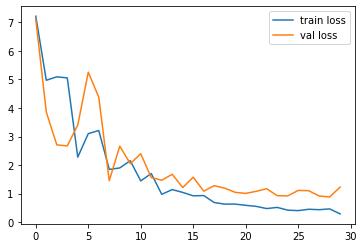

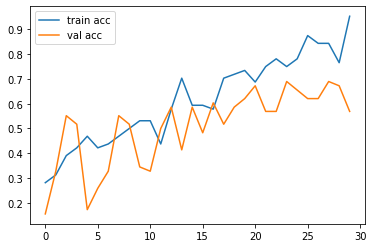

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the Accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save as h5 file - hierarchial data format
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [21]:
y_pred=model.predict(test_set)

In [22]:
y_pred 

array([[5.86507507e-02, 4.23894310e-03, 9.37110364e-01],
       [9.47157800e-01, 9.67344083e-03, 4.31687906e-02],
       [7.69828930e-02, 1.37690306e-01, 7.85326779e-01],
       [5.44490159e-01, 3.29934001e-01, 1.25575826e-01],
       [5.56363687e-02, 2.70017803e-01, 6.74345791e-01],
       [1.74694538e-01, 8.43868405e-02, 7.40918636e-01],
       [8.03240165e-02, 4.92431551e-01, 4.27244395e-01],
       [1.25707969e-01, 2.79642101e-02, 8.46327782e-01],
       [2.69955080e-02, 9.61047530e-01, 1.19570186e-02],
       [2.74279982e-01, 1.38362482e-01, 5.87357581e-01],
       [3.10723577e-03, 3.04553568e-01, 6.92339182e-01],
       [1.53750768e-02, 1.23291835e-01, 8.61333072e-01],
       [9.40759853e-02, 4.33735223e-03, 9.01586711e-01],
       [6.95426436e-03, 1.10727474e-02, 9.81972933e-01],
       [5.63028976e-02, 5.19406460e-02, 8.91756475e-01],
       [1.68609675e-02, 2.00623088e-02, 9.63076711e-01],
       [4.96106893e-01, 2.20198687e-02, 4.81873184e-01],
       [7.94818625e-02, 6.77834

# New section

In [23]:
#take the particular class whichever has high value
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

In [27]:
#test a single car image
img=image.load_img('/content/drive/MyDrive/Datasets/DiffCarDatasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [28]:
#convert image to array
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
#expand the dimensions
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[0.0032802 , 0.00473166, 0.9919882 ]], dtype=float32)

In [33]:
car_predicted=np.argmax(model.predict(img_data),axis=1)

In [34]:
#predicted as mercedes
car_predicted

array([2])

Testing images on Models

In [35]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [36]:
def test_single_image(img):
    cars = ['audi', 'lamborghini', 'mercedes']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = model.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, car, x in zip(range(0,6), y_pred, preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, car, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = fit_generator.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(img)